In [361]:
#Importing Necessary Libraries

In [362]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


# Loading Dataset

In [363]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Top 5 rows of our Dataset

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Checking the Shape of our dataset

In [364]:
data.shape

(1599, 12)

There are 1599 rows and 12 columns

In [365]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Count is equal for all the columns in our dataset
There is very less difference between mean and std value of Residual sugar, free sulphurdioxide and total sulphur dioxide
There is a significant gap between 75% and max in Fixed acidity, volatile acidity, Residual sugar, chlorides, free sulphurdioxide and total sulphur dioxide, sulphates, alcohol  

In [366]:
quality = data['quality']
for i in range(0,len(quality)):
    try:
        if quality[i] >= 7:
            quality[i] = 1
        else: 
            quality[i] = 0
            
    except KeyError: i

        
quality

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [367]:
data.drop_duplicates(inplace = True) #Dropping duplicates and checking shape
data.shape

(1359, 12)

In [368]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [369]:
data["quality"] = quality # Putting changed data in our main dataframe
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Now, as our target variable is of categorical, we will deal with classification models

Now Let's count the frequency of our target variable categories

In [370]:
data['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

It's clearly a class Imbalance problem, Let's plot this information

<AxesSubplot:xlabel='quality', ylabel='count'>

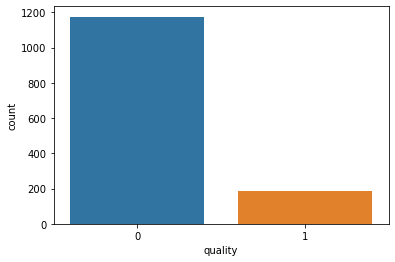

In [371]:
sns.countplot(data['quality'])

we can see that the data in target varible is imbalanced, we will make sure to check this while train test splitting

In [372]:
data.corr()['quality'] # correlation of our label with all feautures

fixed acidity           0.116120
volatile acidity       -0.267344
citric acid             0.203561
residual sugar          0.052811
chlorides              -0.096806
free sulfur dioxide    -0.072771
total sulfur dioxide   -0.135877
density                -0.158052
pH                     -0.054131
sulphates               0.201551
alcohol                 0.409926
quality                 1.000000
Name: quality, dtype: float64

Density is most negatively correlated with our target variable and alcohol is most positively correlated with our target variable.

Let's plot all coulumns

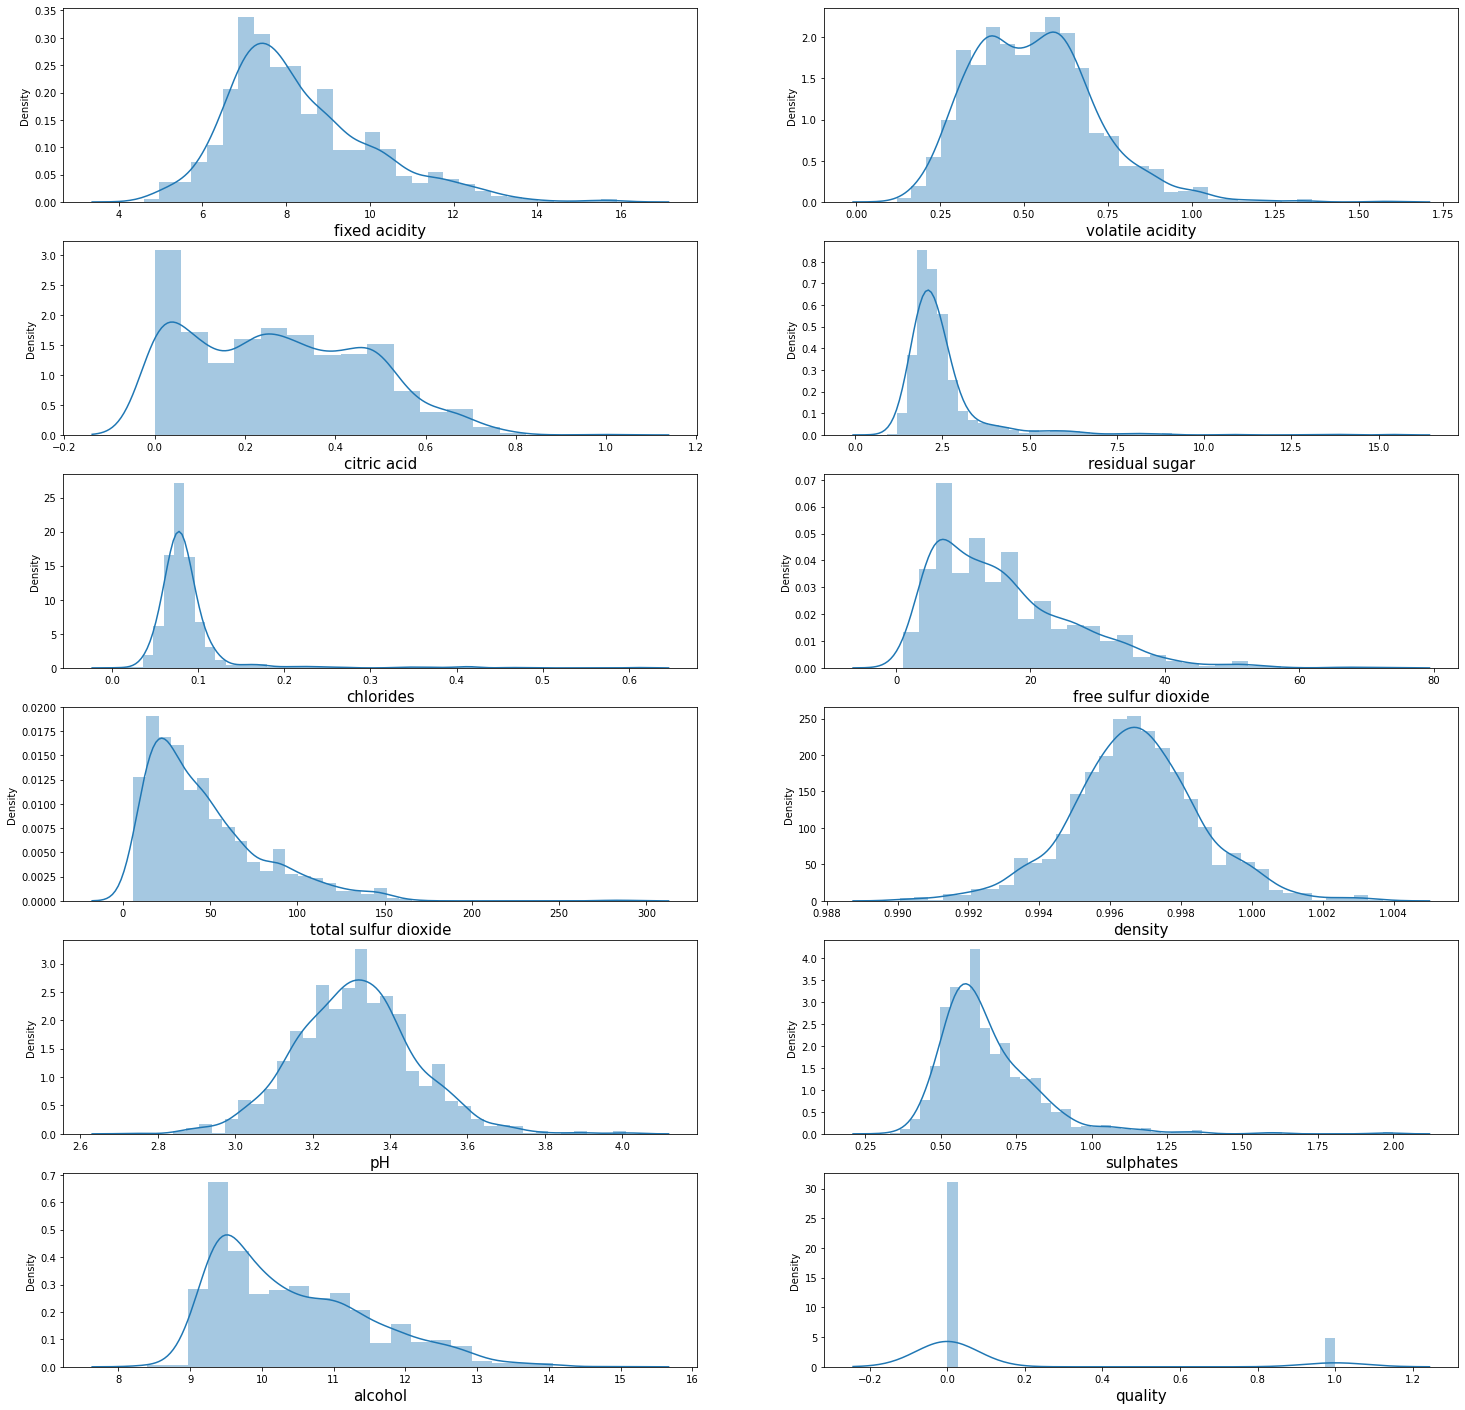

In [373]:
plt.figure(figsize = (25,25))
plotnumber = 1
for column in data:
    if plotnumber <= 12:
        ax = plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber+=1
plt.show()

we can see that our data is not uniformly distributed for our feature varibles, We will not removing our data and will check with this data unaltered

In [374]:
x = data.drop(columns = ['quality'], axis = 1)
y = data['quality']

In [375]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaler = scaler.fit_transform(x)



# Let us balance our target vriable

In [376]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.70, stratify = y)

In [377]:
from sklearn.utils import resample
x = pd.concat([x_train, y_train], axis = 1)

In [378]:
hq = x[x.quality ==0]
lq = x[x.quality ==1]

In [379]:
hq.shape # shape of high quality

(822, 12)

In [380]:
lq.shape # shape of low quality

(129, 12)

In [381]:
lq_upsampled = resample(lq, replace = True, n_samples = len(hq), random_state = 27) # upsampling

In [382]:
upsampled = pd.concat([hq, lq_upsampled])

In [383]:
upsampled.quality.value_counts()

1    822
0    822
Name: quality, dtype: int64

In [384]:
X = upsampled.drop(columns = ['quality'], axis = 1)
Y = upsampled['quality']

In [385]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [386]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 3)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [387]:
knn.score(x_test, y_test)

0.8491484184914841

It is giving more than 84%. Now let us check with using bagging over our KNN classifier and see if our score improves:

In [388]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 10, max_samples = 0.5, bootstrap = True, random_state = 3, oob_score = True)

Let's check our out of bag score

In [389]:
bag_knn.oob_score

True

In [390]:
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.5,
                  oob_score=True, random_state=3)

In [391]:
bag_knn.score(x_test, y_test)

0.7858880778588808

Our score doesn't improved at all, Let's check with pasting method too

In [392]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors = 5), n_estimators = 10, max_samples = 0.5, bootstrap = False, random_state = 3)

In [393]:
pasting_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), bootstrap=False,
                  max_samples=0.5, random_state=3)

In [394]:
pasting_knn.score(x_test, y_test)

0.7834549878345499

Score didn't improve.

# Logistic Regression

In [395]:
log_reg = LogisticRegression()

In [396]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [397]:
log_reg.score(x_test, y_test)

0.8126520681265207

We are getting more than 81%, which is less than our previous models

# Decision Tree

In [398]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


DecisionTreeClassifier()

In [399]:
dt.score(x_test, y_test)

0.9537712895377128

Great! decision Tree model is giving better score than our previous models

Now let us check the results with hyperparameter tuning

In [400]:
params = {'criterion':['entropy','ginni'],
         'max_depth':range(2,15,2),
         'min_samples_split':range(2,10,2),
         'splitter':['best','random'],
         }

In [401]:
dt_grid_search = GridSearchCV(estimator = dt, param_grid = params, cv=5, n_jobs = -1)

In [402]:
dt_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'ginni'],
                         'max_depth': range(2, 15, 2),
                         'min_samples_split': range(2, 10, 2),
                         'splitter': ['best', 'random']})

In [403]:
dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_split': 4,
 'splitter': 'best'}

In [404]:
dt_grid_search.best_score_

0.9391955498502353

In [405]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=12,
                       min_samples_split=2, splitter ='best')

In [406]:
DT.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [407]:
DT.score(x_test, y_test)

0.948905109489051

There is little improvement after tuning

# Random Forest

In [408]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [409]:
params = {'n_estimators':[13,15],
         'criterion':['entropy','ginni'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6],
         }

grd = GridSearchCV(clf, param_grid = params)
grd.fit(x_train, y_train)
print('best_param = >', grd.best_params_)

best_param = > {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [410]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [411]:
clf.score(x_train, y_train)

1.0

In [412]:
clf.score(x_test, y_test)

0.9586374695863747

In [413]:
# Now let us check the results with hyperparameter tuning

In [414]:
grd.best_score_

0.918909844968895

In [415]:
CLF = RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=13)

In [416]:
CLF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=10, n_estimators=13)

In [417]:
CLF.score(x_train, y_train)

0.9716139497161395

In [418]:
CLF.score(x_test, y_test)

0.9367396593673966

Let's plot ROC AUC score

In [419]:
roc_auc_score(y_test, CLF.predict(x_test)) #Random forest classifier

0.9352198870914181

In [420]:
roc_auc_score(y_test, log_reg.predict(x_test)) # Logistic regression

0.812230181697424

In [421]:
roc_auc_score(y_test, knn.predict(x_test)) # KNeighbours Classifier

0.8464704207979507

In [422]:
roc_auc_score(y_test, DT.predict(x_test)) # Decision tree

0.9469021300820722

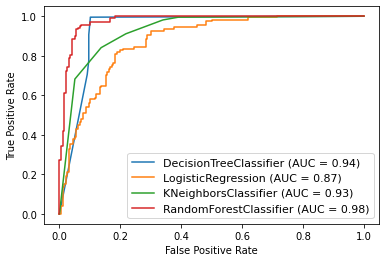

In [423]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve


disp = plot_roc_curve(DT, x_test, y_test)
plot_roc_curve(log_reg, x_test, y_test, ax = disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(CLF, x_test, y_test, ax = disp.ax_)
plt.legend(prop = {'size' : 11}, loc = 'lower right')
plt.show()

Looking at the graph we can see that RandomForestClassifier is covering the maximum area, hence we can infer that it is the best model.

# Model Saving

In [424]:
import pickle
filename = "Red Wine Quality"
pickle.dump(CLF, open(filename,'wb'))